## Aula 02: Exploração dos dados

### Aula 02.01 : Explorando os dados

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
fonte_2019 = '../dados/obitos-2019.csv'
fonte_2020 = '../dados/obitos-2020.csv'
fonte_2021 = '../dados/obitos-2021.csv'

dados_2019 = pd.read_csv(fonte_2019)
dados_2020 = pd.read_csv(fonte_2020)

print(f'2019 {dados_2019.shape}\n2020 {dados_2020.shape}')

2019 (12382, 6)
2020 (14905, 6)


In [6]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [7]:
dados_2020.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,12
2,AC,OUTRAS,HOSPITAL,< 9,F,47
3,AC,OUTRAS,HOSPITAL,< 9,M,45
4,AC,OUTRAS,OUTRO,< 9,F,4


In [8]:
dados_2020.sample(n=5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
10318,BA,PNEUMONIA,DOMICILIO,80 - 89,M,78
14115,AL,SEPTICEMIA,HOSPITAL,N/I,M,1
12981,SC,COVID,OUTROS_SERVICOS_SAUDE,90 - 99,M,3
7978,RN,OUTRAS,HOSPITAL,60 - 69,M,432
14693,RN,INDETERMINADA,HOSPITAL,N/I,M,1


In [12]:
len(dados_2019.uf.unique())

27

In [13]:
len(dados_2020.uf.unique())

27

In [14]:
dados_2020.tipo_doenca.unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [29]:
dados_2019.tipo_doenca.unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [30]:
dados_2019.tipo_doenca.value_counts()

OUTRAS                        3846
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2324
SEPTICEMIA                    2063
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [18]:
dados_2020.tipo_doenca.value_counts()

OUTRAS                        3798
INSUFICIENCIA_RESPIRATORIA    2333
PNEUMONIA                     2212
COVID                         2107
SEPTICEMIA                    2029
INDETERMINADA                 1345
SRAG                          1081
Name: tipo_doenca, dtype: int64

In [36]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()

display(total_obitos_2019, total_obitos_2020)

,total
tipo_doenca,
COVID,1
INDETERMINADA,6988
INSUFICIENCIA_RESPIRATORIA,100552
OUTRAS,660421
PNEUMONIA,226280
SEPTICEMIA,175487
SRAG,1498


,total
tipo_doenca,
COVID,195423
INDETERMINADA,9699
INSUFICIENCIA_RESPIRATORIA,98819
OUTRAS,689116
PNEUMONIA,181867
SEPTICEMIA,162646
SRAG,16542


In [37]:
proporcao = total_obitos_2020 / total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,195423.000000
INDETERMINADA,1.387951
INSUFICIENCIA_RESPIRATORIA,0.982765
OUTRAS,1.043450
PNEUMONIA,0.803725
SEPTICEMIA,0.926826
SRAG,11.042724


### Aula 02.02 : Visualizando os dados

In [45]:
def grafico_comparativo(causa):

    # criando variáveis
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()

    #criando lista de apoio
    lista = [total_2019.loc[causa][0], total_2020.loc[causa][0]]
    
    #criando df
    dados = pd.DataFrame({'Total' : lista,
                          'Ano' : [2019,2020]})
    #criando o gráfico

    plt.figure(figsize=(12,8))
    sns.barplot(x='Ano', y = 'Total', data=dados)
    plt.title(f'Óbitos por {causa}')
    plt.show()
    

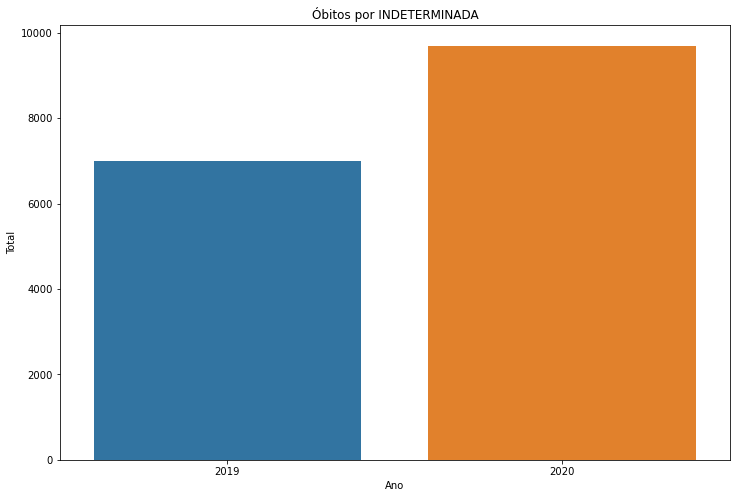

In [47]:
grafico_comparativo('INDETERMINADA')

### Aula 02.03: Criando uma função mais genérica

In [109]:
def grafico_comparativo(causa : str, estado='BRASIL'):

    if estado == 'BRASIL':
        # criando variáveis
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()

        #criando lista de apoio
        lista = [total_2019.loc[causa][0], total_2020.loc[causa][0]]
    else:
        # criando variáveis
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()

        #criando lista de apoio
        lista = [total_2019.loc[estado,causa][0], total_2020.loc[estado,causa][0]]
    
    #criando df
    dados = pd.DataFrame({'Total' : lista,
                          'Ano' : [2019,2020]})
    #criando o gráfico

    plt.figure(figsize=(12,8))
    sns.barplot(x='Ano', y = 'Total', data=dados)
    plt.title(f'Óbitos por {causa} - {estado}')
    plt.show()

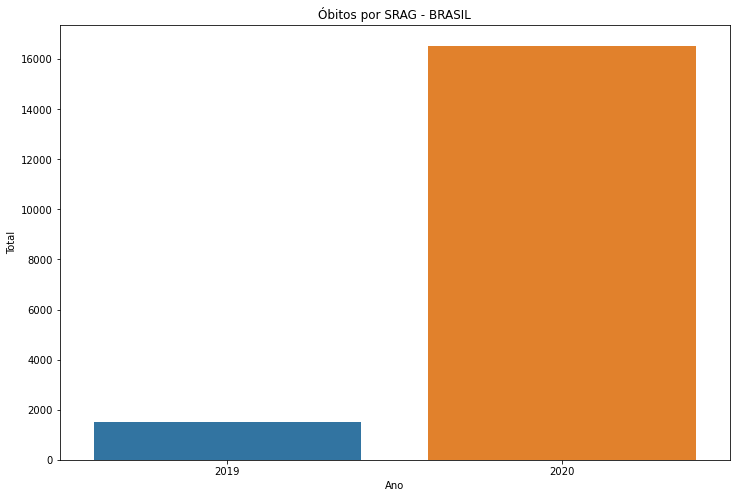

In [110]:
grafico_comparativo('SRAG')

# Desafios

## Desafio 01 : Acessar o portal e verificar como são classificados os dados.

## Desafio 02 : Corrigir o erro do Thiago na contagem de dados.

In [31]:
dados_2019.groupby('tipo_doenca').sum()

,total
tipo_doenca,
COVID,1
INDETERMINADA,6988
INSUFICIENCIA_RESPIRATORIA,100552
OUTRAS,660421
PNEUMONIA,226280
SEPTICEMIA,175487
SRAG,1498


In [32]:
dados_2020.groupby('tipo_doenca').sum()

,total
tipo_doenca,
COVID,195423
INDETERMINADA,9699
INSUFICIENCIA_RESPIRATORIA,98819
OUTRAS,689116
PNEUMONIA,181867
SEPTICEMIA,162646
SRAG,16542


## Desafio 03: Explorar os outros campos da base.

## Desafio 04: Adicionar na função a opção de filtrar por estado.

In [102]:
def grafico_comparativo_op(causa : str, estado= None):

    if estado == None:
        # criando variáveis
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()

        #criando lista de apoio
        lista = [total_2019.loc[causa][0], total_2020.loc[causa][0]]
        estado = 'todo país'
    else:
        # criando variáveis
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()

        #criando lista de apoio
        lista = [total_2019.loc[estado,causa][0], total_2020.loc[estado,causa][0]]

    
    #criando df
    dados = pd.DataFrame({'Total' : lista,
                        'Ano' : [2019,2020]})
    #criando o gráfico

    plt.figure(figsize=(12,8))
    sns.barplot(x='Ano', y = 'Total', data=dados)
    plt.title(f'Óbitos por {causa} em {estado}', loc='left', fontsize= 20, fontweight='bold')
    plt.show()

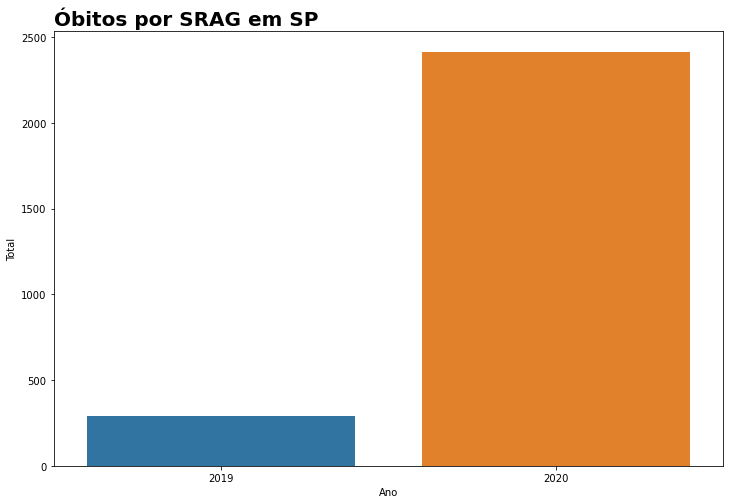

In [103]:
grafico_comparativo_op(estado="SP", causa = "SRAG")

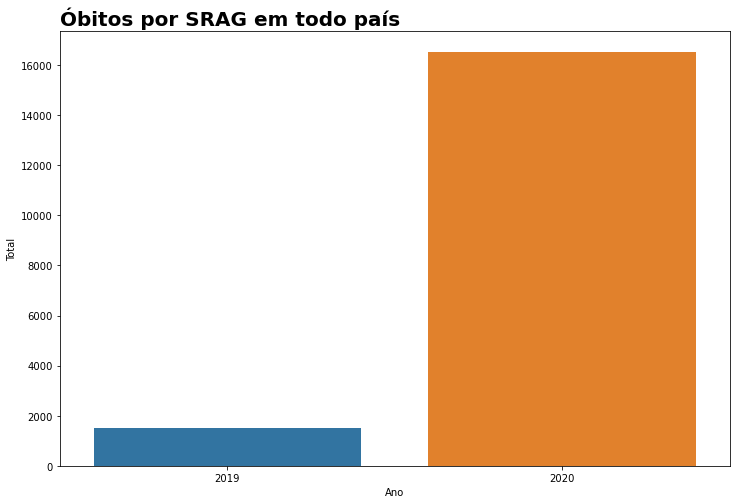

In [104]:
grafico_comparativo_op(causa='SRAG')

## Desafio 05: Entender como funciona uma aplicação web.

## Desafio 06: Melhorar a função para aceitar apenas o estado.


In [116]:
def grafico_comparativo_op(causa = None, estado= None):

    if estado == None:
        # criando variáveis
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()

        #criando lista de apoio
        lista = [total_2019.loc[causa][0], total_2020.loc[causa][0]]
        estado = 'todo país'
    elif causa == None:
        # criando variáveis
        total_2019 = dados_2019.groupby('uf').sum()
        total_2020 = dados_2020.groupby('uf').sum()

        #criando lista de apoio
        lista = [total_2019.loc[estado][0], total_2020.loc[estado][0]]
        causa='todas as doenças'
    
    else:
        # criando variáveis
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()

        #criando lista de apoio
        lista = [total_2019.loc[estado,causa][0], total_2020.loc[estado,causa][0]]

    
    #criando df
    dados = pd.DataFrame({'Total' : lista,
                        'Ano' : [2019,2020]})
    #criando o gráfico

    plt.figure(figsize=(12,8))
    sns.barplot(x='Ano', y = 'Total', data=dados)
    plt.title(f'Óbitos por {causa} em {estado}', loc='left', fontsize= 20, fontweight='bold')
    plt.show()

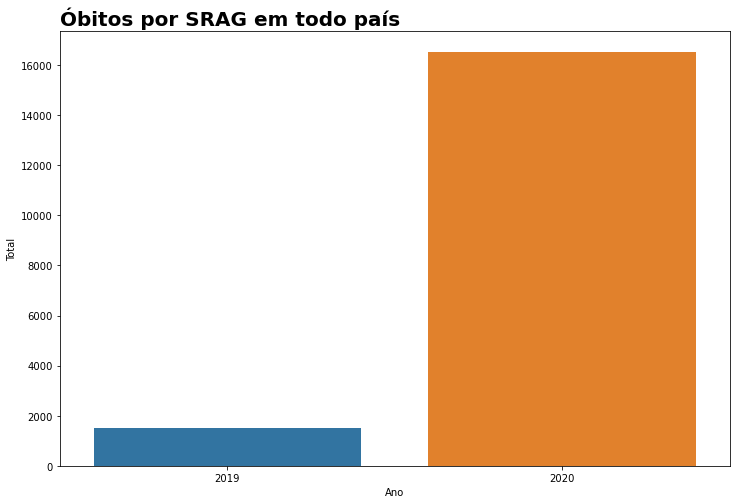

In [117]:
grafico_comparativo_op('SRAG')

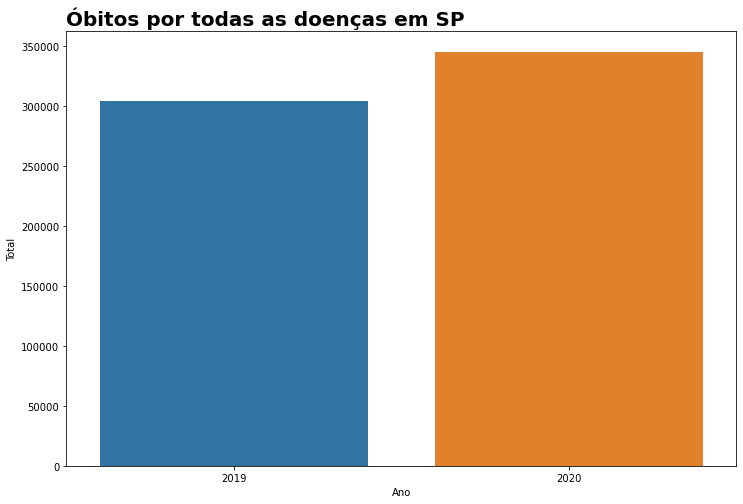

In [118]:
grafico_comparativo_op(estado='SP')

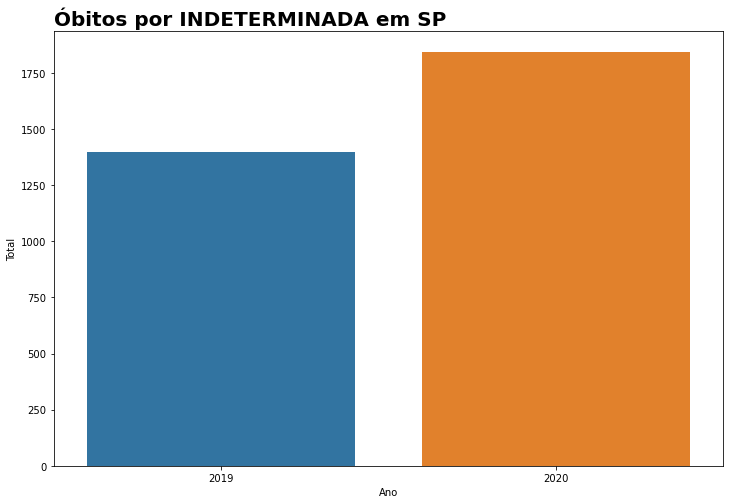

In [124]:
grafico_comparativo_op( causa='INDETERMINADA',estado='SP')